In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

Working with asthma data first

In [4]:
df = pd.read_csv('C:/Users/butle/hp/Capstone_Two/data/interim/asthma_data.csv')
df.head()

CensusTract  Asthma_prevalence  Low_Confidence_Limit  \
0   1001020200               10.9                  10.4   
1   1001020400                8.8                   8.4   
2   1001021000               10.3                  10.0   
3   1003010905                9.4                   9.1   
4   1003010906                9.9                   9.4   

   High_Confidence_Limit  TotalPopHealth      PM25      OZONE  DieselPM  \
0                   11.4            2170  9.711240  36.836966  0.304313   
1                    9.3            4386  9.761186  36.949586  0.447920   
2                   10.6            2894  9.292441  35.908669  0.160869   
3                    9.8            8011  8.402913  37.153641  0.233462   
4                   10.5            4302  8.414995  36.808459  0.249121   

   AirToxicsRisk      RESP       PTRAF  PRE1960PCT      PNPL      PRMP  \
0      50.320741  0.808744  133.186831    0.262809  0.073066  0.083303   
1      51.595926  0.835904  448.339640    0.114548  0.084700  0.087962   
2      45.941855  0.733025    4.501463    0.166322  0.024765  0.222258   
3      35.633327  0.528960  224.749567    0.099045  0.020701  0.528059   
4      36.136884  0.539997  103.595218    0.063483  0.021972  0.614922   

      PTSDF         PWDIS  
0  0.867199  0.000000e+00  
1  2.299506  0.000000e+00  
2  0.042577  2.861655e-04  
3  0.078937  1.444756e-04  
4  0.063767  1.033556e-07

In [5]:
np.mean(df['Asthma_prevalence'])

10.031229346127787

Dropping MeasureId because all of this health data is from CANCER and dropping columns that I will probably not need, the limits and total population for the health data. Also, changing index to CensusTract.

In [6]:
df.drop(['Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopHealth'], axis=1, inplace=True)
df.set_index('CensusTract', inplace=True)
df.head()

Asthma_prevalence      PM25      OZONE  DieselPM  AirToxicsRisk  \
CensusTract                                                                    
1001020200                10.9  9.711240  36.836966  0.304313      50.320741   
1001020400                 8.8  9.761186  36.949586  0.447920      51.595926   
1001021000                10.3  9.292441  35.908669  0.160869      45.941855   
1003010905                 9.4  8.402913  37.153641  0.233462      35.633327   
1003010906                 9.9  8.414995  36.808459  0.249121      36.136884   

                 RESP       PTRAF  PRE1960PCT      PNPL      PRMP     PTSDF  \
CensusTract                                                                   
1001020200   0.808744  133.186831    0.262809  0.073066  0.083303  0.867199   
1001020400   0.835904  448.339640    0.114548  0.084700  0.087962  2.299506   
1001021000   0.733025    4.501463    0.166322  0.024765  0.222258  0.042577   
1003010905   0.528960  224.749567    0.099045  0.020701  0.528059  0.078937   
1003010906   0.539997  103.595218    0.063483  0.021972  0.614922  0.063767   

                    PWDIS  
CensusTract                
1001020200   0.000000e+00  
1001020400   0.000000e+00  
1001021000   2.861655e-04  
1003010905   1.444756e-04  
1003010906   1.033556e-07

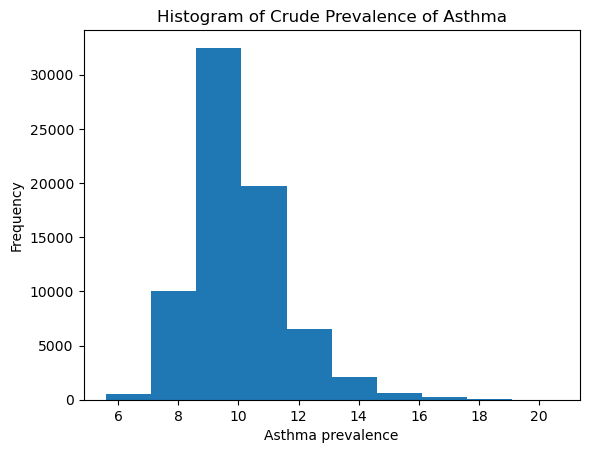

In [7]:
_ = plt.hist(df['Asthma_prevalence'])
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Asthma prevalence')
_ = plt.title('Histogram of Crude Prevalence of Asthma')

Visualizing parameters to see any clear correlations.

In [8]:
df.corr()

Asthma_prevalence      PM25     OZONE  DieselPM  \
Asthma_prevalence           1.000000 -0.028429  0.110788 -0.018982   
PM25                       -0.028429  1.000000  0.401830  0.248008   
OZONE                       0.110788  0.401830  1.000000  0.039513   
DieselPM                   -0.018982  0.248008  0.039513  1.000000   
AirToxicsRisk              -0.017102  0.392767  0.096450  0.343077   
RESP                       -0.024781  0.545526  0.128479  0.585017   
PTRAF                      -0.003949  0.220669  0.037795  0.456339   
PRE1960PCT                  0.281981  0.052940  0.011966  0.324646   
PNPL                        0.005500  0.062338 -0.008894  0.207096   
PRMP                        0.127922  0.226179  0.065721  0.238852   
PTSDF                      -0.037394  0.057516 -0.021075  0.617922   
PWDIS                      -0.000535  0.003380  0.000751  0.004680   

                   AirToxicsRisk      RESP     PTRAF  PRE1960PCT      PNPL  \
Asthma_prevalence      -0.017102 -0.024781 -0.003949    0.281981  0.005500   
PM25                    0.392767  0.545526  0.220669    0.052940  0.062338   
OZONE                   0.096450  0.128479  0.037795    0.011966 -0.008894   
DieselPM                0.343077  0.585017  0.456339    0.324646  0.207096   
AirToxicsRisk           1.000000  0.619348  0.169065   -0.011072  0.054519   
RESP                    0.619348  1.000000  0.314657    0.002878  0.101524   
PTRAF                   0.169065  0.314657  1.000000    0.234633  0.129830   
PRE1960PCT             -0.011072  0.002878  0.234633    1.000000  0.167739   
PNPL                    0.054519  0.101524  0.129830    0.167739  1.000000   
PRMP                    0.178917  0.210057  0.183744    0.255859  0.160936   
PTSDF                   0.154636  0.337806  0.303923    0.214053  0.142546   
PWDIS                  -0.001279 -0.001408  0.003891    0.007079  0.004078   

                       PRMP     PTSDF     PWDIS  
Asthma_prevalence  0.127922 -0.037394 -0.000535  
PM25               0.226179  0.057516  0.003380  
OZONE              0.065721 -0.021075  0.000751  
DieselPM           0.238852  0.617922  0.004680  
AirToxicsRisk      0.178917  0.154636 -0.001279  
RESP               0.210057  0.337806 -0.001408  
PTRAF              0.183744  0.303923  0.003891  
PRE1960PCT         0.255859  0.214053  0.007079  
PNPL               0.160936  0.142546  0.004078  
PRMP               1.000000  0.045509  0.018822  
PTSDF              0.045509  1.000000  0.000967  
PWDIS              0.018822  0.000967  1.000000

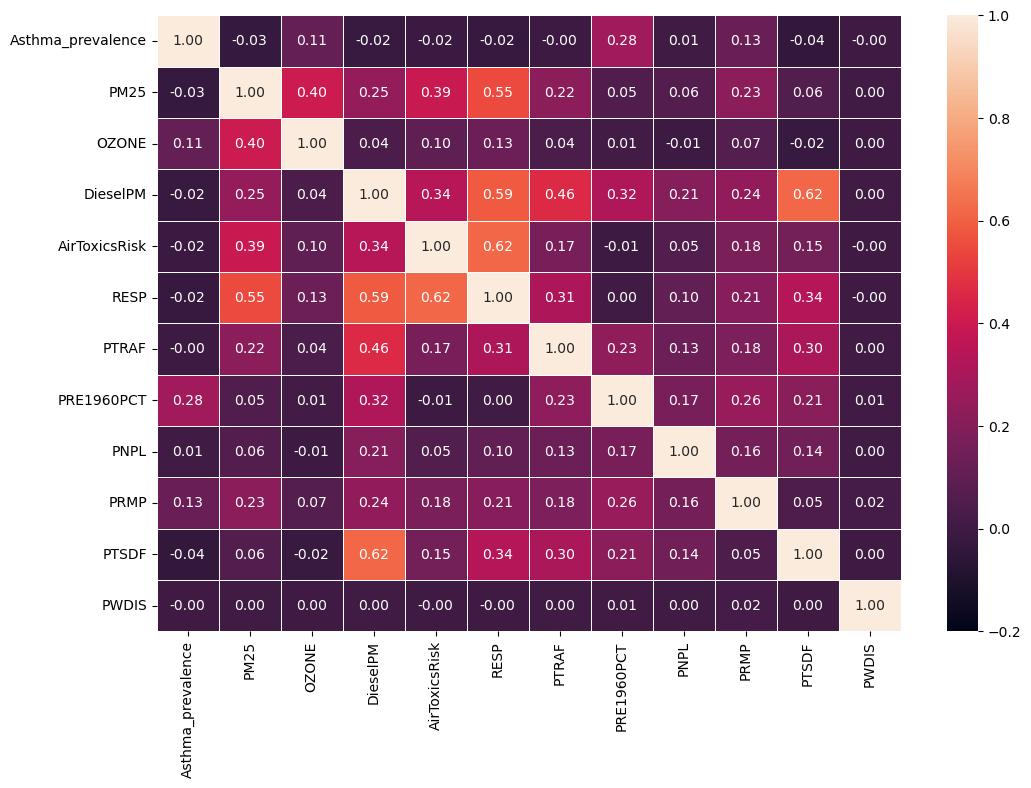

In [9]:
f, ax = plt.subplots(figsize=(12, 8))
_ = sns.heatmap(df.corr(), vmin=-.2, vmax=1, annot=True, fmt=".2f", linewidth=.5)

Only OZONE, PRE1960PCT, and PRMP show a positive correlation to crude prevalence of asthma.

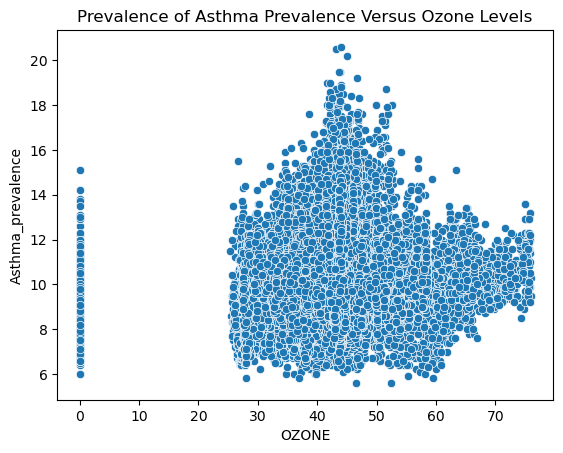

In [10]:
_ = sns.scatterplot(x='OZONE', y='Asthma_prevalence', data=df)
_ = _.set_title('Prevalence of Asthma Prevalence Versus Ozone Levels')

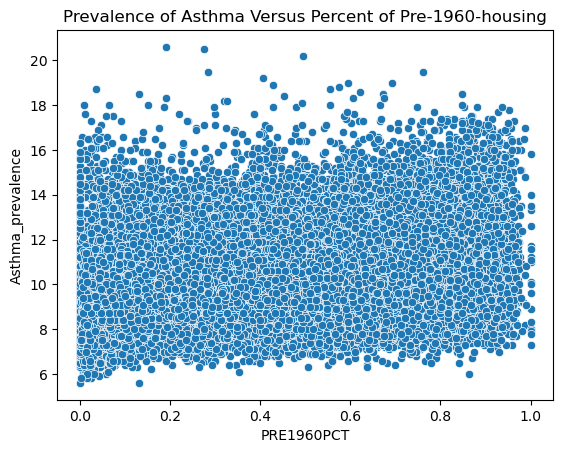

In [11]:
_ = sns.scatterplot(x='PRE1960PCT', y='Asthma_prevalence', data=df)
_ = _.set_title('Prevalence of Asthma Versus Percent of Pre-1960-housing')

In [12]:
df2 = pd.read_csv('C:/Users/butle/hp/Capstone_Two/data/interim/cancer_data.csv')
df2.head()

CensusTract  Cancer_prevalence  Low_Confidence_Limit  \
0   1001020200                5.0                   4.8   
1   1001020400                8.0                   7.5   
2   1001021000                6.2                   6.0   
3   1003010905                6.1                   5.9   
4   1003010906                7.1                   6.7   

   High_Confidence_Limit  TotalPopHealth      PM25      OZONE  DieselPM  \
0                    5.2            2170  9.711240  36.836966  0.304313   
1                    8.4            4386  9.761186  36.949586  0.447920   
2                    6.3            2894  9.292441  35.908669  0.160869   
3                    6.3            8011  8.402913  37.153641  0.233462   
4                    7.5            4302  8.414995  36.808459  0.249121   

   AirToxicsRisk      RESP       PTRAF  PRE1960PCT      PNPL      PRMP  \
0      50.320741  0.808744  133.186831    0.262809  0.073066  0.083303   
1      51.595926  0.835904  448.339640    0.114548  0.084700  0.087962   
2      45.941855  0.733025    4.501463    0.166322  0.024765  0.222258   
3      35.633327  0.528960  224.749567    0.099045  0.020701  0.528059   
4      36.136884  0.539997  103.595218    0.063483  0.021972  0.614922   

      PTSDF         PWDIS  
0  0.867199  0.000000e+00  
1  2.299506  0.000000e+00  
2  0.042577  2.861655e-04  
3  0.078937  1.444756e-04  
4  0.063767  1.033556e-07

In [13]:
df2.drop(['Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopHealth', 'CensusTract'], axis=1, inplace=True)
df2.head()

Cancer_prevalence      PM25      OZONE  DieselPM  AirToxicsRisk      RESP  \
0                5.0  9.711240  36.836966  0.304313      50.320741  0.808744   
1                8.0  9.761186  36.949586  0.447920      51.595926  0.835904   
2                6.2  9.292441  35.908669  0.160869      45.941855  0.733025   
3                6.1  8.402913  37.153641  0.233462      35.633327  0.528960   
4                7.1  8.414995  36.808459  0.249121      36.136884  0.539997   

        PTRAF  PRE1960PCT      PNPL      PRMP     PTSDF         PWDIS  
0  133.186831    0.262809  0.073066  0.083303  0.867199  0.000000e+00  
1  448.339640    0.114548  0.084700  0.087962  2.299506  0.000000e+00  
2    4.501463    0.166322  0.024765  0.222258  0.042577  2.861655e-04  
3  224.749567    0.099045  0.020701  0.528059  0.078937  1.444756e-04  
4  103.595218    0.063483  0.021972  0.614922  0.063767  1.033556e-07

Dropping MeasureId because all of this health data is from CANCER and dropping columns that I will probably not need, the limits and total population for the health data. Also, changing index to CensusTract.

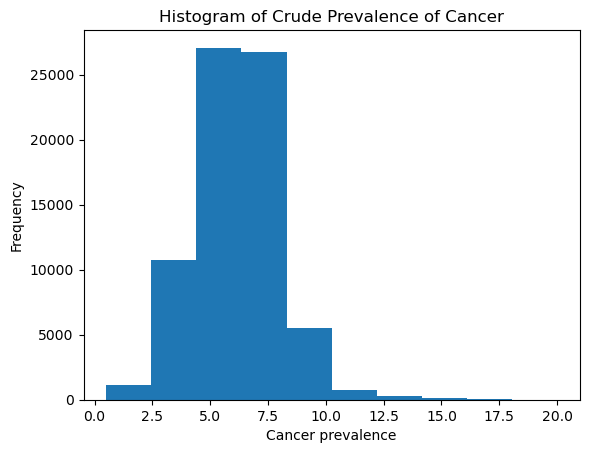

In [14]:
_ = plt.hist(df2['Cancer_prevalence'])
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Cancer prevalence')
_ = plt.title('Histogram of Crude Prevalence of Cancer')

In [15]:
df2.corr()

Cancer_prevalence      PM25     OZONE  DieselPM  \
Cancer_prevalence           1.000000 -0.219611 -0.106416 -0.317580   
PM25                       -0.219611  1.000000  0.401830  0.248008   
OZONE                      -0.106416  0.401830  1.000000  0.039513   
DieselPM                   -0.317580  0.248008  0.039513  1.000000   
AirToxicsRisk              -0.199981  0.392767  0.096450  0.343077   
RESP                       -0.306677  0.545526  0.128479  0.585017   
PTRAF                      -0.246381  0.220669  0.037795  0.456339   
PRE1960PCT                 -0.062947  0.052940  0.011966  0.324646   
PNPL                       -0.119024  0.062338 -0.008894  0.207096   
PRMP                       -0.220501  0.226179  0.065721  0.238852   
PTSDF                      -0.151194  0.057516 -0.021075  0.617922   
PWDIS                      -0.001731  0.003380  0.000751  0.004680   

                   AirToxicsRisk      RESP     PTRAF  PRE1960PCT      PNPL  \
Cancer_prevalence      -0.199981 -0.306677 -0.246381   -0.062947 -0.119024   
PM25                    0.392767  0.545526  0.220669    0.052940  0.062338   
OZONE                   0.096450  0.128479  0.037795    0.011966 -0.008894   
DieselPM                0.343077  0.585017  0.456339    0.324646  0.207096   
AirToxicsRisk           1.000000  0.619348  0.169065   -0.011072  0.054519   
RESP                    0.619348  1.000000  0.314657    0.002878  0.101524   
PTRAF                   0.169065  0.314657  1.000000    0.234633  0.129830   
PRE1960PCT             -0.011072  0.002878  0.234633    1.000000  0.167739   
PNPL                    0.054519  0.101524  0.129830    0.167739  1.000000   
PRMP                    0.178917  0.210057  0.183744    0.255859  0.160936   
PTSDF                   0.154636  0.337806  0.303923    0.214053  0.142546   
PWDIS                  -0.001279 -0.001408  0.003891    0.007079  0.004078   

                       PRMP     PTSDF     PWDIS  
Cancer_prevalence -0.220501 -0.151194 -0.001731  
PM25               0.226179  0.057516  0.003380  
OZONE              0.065721 -0.021075  0.000751  
DieselPM           0.238852  0.617922  0.004680  
AirToxicsRisk      0.178917  0.154636 -0.001279  
RESP               0.210057  0.337806 -0.001408  
PTRAF              0.183744  0.303923  0.003891  
PRE1960PCT         0.255859  0.214053  0.007079  
PNPL               0.160936  0.142546  0.004078  
PRMP               1.000000  0.045509  0.018822  
PTSDF              0.045509  1.000000  0.000967  
PWDIS              0.018822  0.000967  1.000000

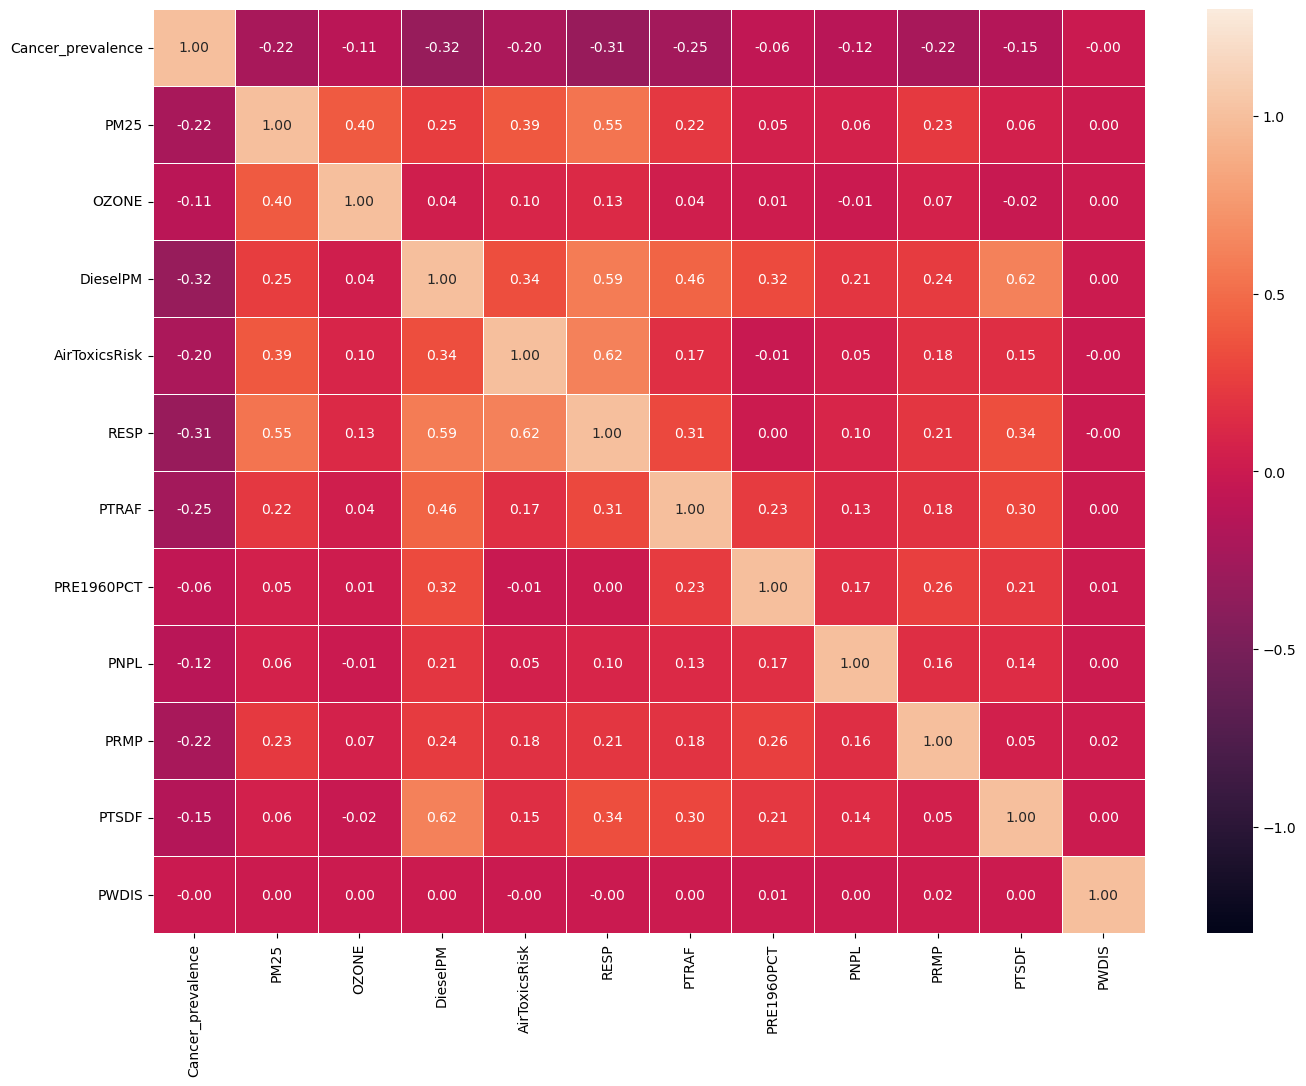

In [16]:
f, ax = plt.subplots(figsize=(16, 12))
_ = sns.heatmap(df2.corr(), vmin=-1.3, vmax=1.3, annot=True, fmt=".2f", linewidth=.5)

None of these environmental factors are positively correlated with cancer.

b

Now kidney disease

In [17]:
df3 = pd.read_csv('C:/Users/butle/hp/Capstone_Two/data/interim/kidney_data.csv')
df3.head()

CensusTract  Kidney_prevalence  Low_Confidence_Limit  \
0   1001020200                3.1                   2.9   
1   1001020400                2.9                   2.7   
2   1001021000                3.3                   3.2   
3   1003010905                2.7                   2.6   
4   1003010906                3.3                   3.0   

   High_Confidence_Limit  TotalPopHealth      PM25      OZONE  DieselPM  \
0                    3.3            2170  9.711240  36.836966  0.304313   
1                    3.2            4386  9.761186  36.949586  0.447920   
2                    3.4            2894  9.292441  35.908669  0.160869   
3                    2.9            8011  8.402913  37.153641  0.233462   
4                    3.6            4302  8.414995  36.808459  0.249121   

   AirToxicsRisk      RESP       PTRAF  PRE1960PCT      PNPL      PRMP  \
0      50.320741  0.808744  133.186831    0.262809  0.073066  0.083303   
1      51.595926  0.835904  448.339640    0.114548  0.084700  0.087962   
2      45.941855  0.733025    4.501463    0.166322  0.024765  0.222258   
3      35.633327  0.528960  224.749567    0.099045  0.020701  0.528059   
4      36.136884  0.539997  103.595218    0.063483  0.021972  0.614922   

      PTSDF         PWDIS  
0  0.867199  0.000000e+00  
1  2.299506  0.000000e+00  
2  0.042577  2.861655e-04  
3  0.078937  1.444756e-04  
4  0.063767  1.033556e-07

In [18]:
df3.drop(['Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopHealth'], axis=1, inplace=True)
df3.set_index('CensusTract', inplace=True)
df3.head()

Kidney_prevalence      PM25      OZONE  DieselPM  AirToxicsRisk  \
CensusTract                                                                    
1001020200                 3.1  9.711240  36.836966  0.304313      50.320741   
1001020400                 2.9  9.761186  36.949586  0.447920      51.595926   
1001021000                 3.3  9.292441  35.908669  0.160869      45.941855   
1003010905                 2.7  8.402913  37.153641  0.233462      35.633327   
1003010906                 3.3  8.414995  36.808459  0.249121      36.136884   

                 RESP       PTRAF  PRE1960PCT      PNPL      PRMP     PTSDF  \
CensusTract                                                                   
1001020200   0.808744  133.186831    0.262809  0.073066  0.083303  0.867199   
1001020400   0.835904  448.339640    0.114548  0.084700  0.087962  2.299506   
1001021000   0.733025    4.501463    0.166322  0.024765  0.222258  0.042577   
1003010905   0.528960  224.749567    0.099045  0.020701  0.528059  0.078937   
1003010906   0.539997  103.595218    0.063483  0.021972  0.614922  0.063767   

                    PWDIS  
CensusTract                
1001020200   0.000000e+00  
1001020400   0.000000e+00  
1001021000   2.861655e-04  
1003010905   1.444756e-04  
1003010906   1.033556e-07

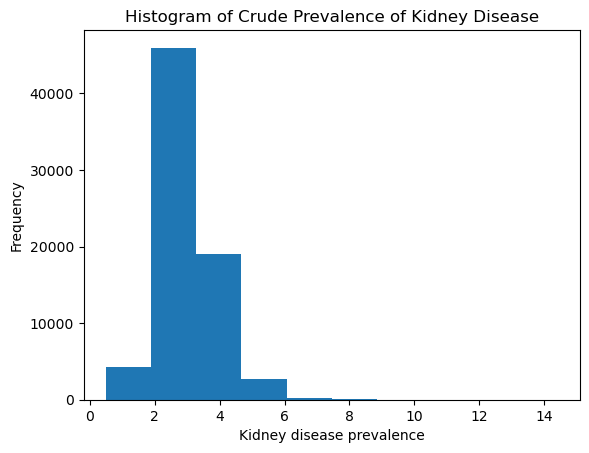

In [19]:
_ = plt.hist(df3['Kidney_prevalence'])
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Kidney disease prevalence')
_ = plt.title('Histogram of Crude Prevalence of Kidney Disease')

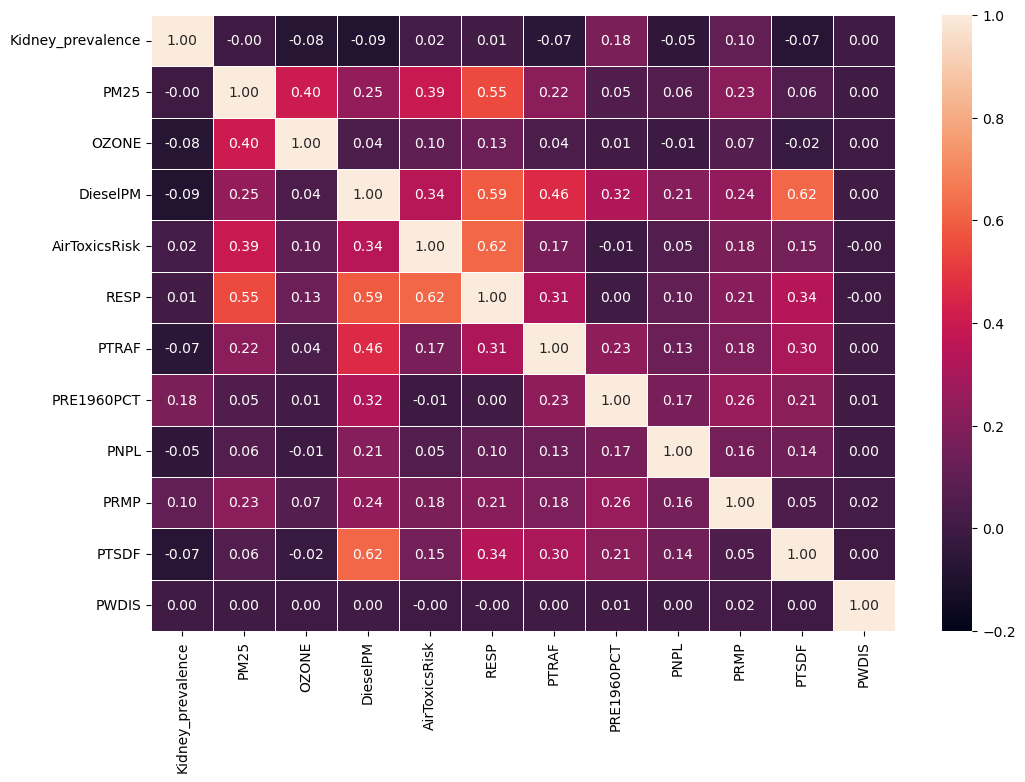

In [20]:
f, ax = plt.subplots(figsize=(12, 8))
_ = sns.heatmap(df3.corr(), vmin=-.2, vmax=1, annot=True, fmt=".2f", linewidth=.5)

Only PRE1960PCT, and PRMP show a positive correlation of more than .02 to crude prevalence of Kidney problems.

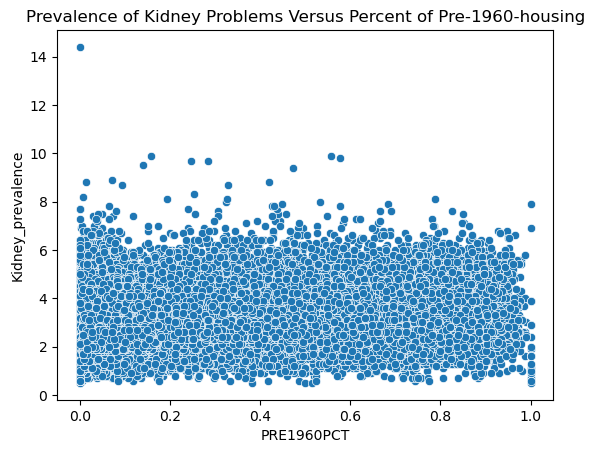

In [21]:
 _ = sns.scatterplot(x='PRE1960PCT', y='Kidney_prevalence', data=df3)
_ = _.set_title('Prevalence of Kidney Problems Versus Percent of Pre-1960-housing')

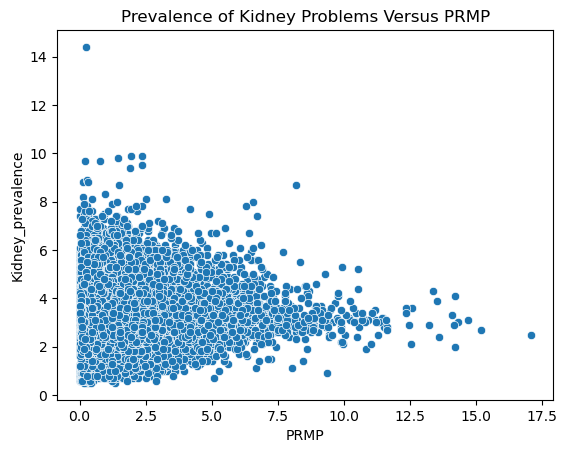

In [22]:
_ = sns.scatterplot(x='PRMP', y='Kidney_prevalence', data=df3)
_ = _.set_title('Prevalence of Kidney Problems Versus PRMP')

No reasonable correlation

b

Now COPD

In [23]:
df4 = pd.read_csv('C:/Users/butle/hp/Capstone_Two/data/interim/copd_data.csv')
df4.head()

CensusTract  COPD_prevalence  Low_Confidence_Limit  High_Confidence_Limit  \
0   1001020200              7.6                   6.8                    8.5   
1   1001020400              7.2                   6.0                    8.6   
2   1001021000              9.2                   8.5                    9.9   
3   1003010905              7.8                   7.1                    8.6   
4   1003010906              9.8                   8.6                   11.2   

   TotalPopHealth      PM25      OZONE  DieselPM  AirToxicsRisk      RESP  \
0            2170  9.711240  36.836966  0.304313      50.320741  0.808744   
1            4386  9.761186  36.949586  0.447920      51.595926  0.835904   
2            2894  9.292441  35.908669  0.160869      45.941855  0.733025   
3            8011  8.402913  37.153641  0.233462      35.633327  0.528960   
4            4302  8.414995  36.808459  0.249121      36.136884  0.539997   

        PTRAF  PRE1960PCT      PNPL      PRMP     PTSDF         PWDIS  
0  133.186831    0.262809  0.073066  0.083303  0.867199  0.000000e+00  
1  448.339640    0.114548  0.084700  0.087962  2.299506  0.000000e+00  
2    4.501463    0.166322  0.024765  0.222258  0.042577  2.861655e-04  
3  224.749567    0.099045  0.020701  0.528059  0.078937  1.444756e-04  
4  103.595218    0.063483  0.021972  0.614922  0.063767  1.033556e-07

In [24]:
df4.drop(['Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopHealth'], axis=1, inplace=True)
df4.set_index('CensusTract', inplace=True)
df4.head()

COPD_prevalence      PM25      OZONE  DieselPM  AirToxicsRisk  \
CensusTract                                                                  
1001020200               7.6  9.711240  36.836966  0.304313      50.320741   
1001020400               7.2  9.761186  36.949586  0.447920      51.595926   
1001021000               9.2  9.292441  35.908669  0.160869      45.941855   
1003010905               7.8  8.402913  37.153641  0.233462      35.633327   
1003010906               9.8  8.414995  36.808459  0.249121      36.136884   

                 RESP       PTRAF  PRE1960PCT      PNPL      PRMP     PTSDF  \
CensusTract                                                                   
1001020200   0.808744  133.186831    0.262809  0.073066  0.083303  0.867199   
1001020400   0.835904  448.339640    0.114548  0.084700  0.087962  2.299506   
1001021000   0.733025    4.501463    0.166322  0.024765  0.222258  0.042577   
1003010905   0.528960  224.749567    0.099045  0.020701  0.528059  0.078937   
1003010906   0.539997  103.595218    0.063483  0.021972  0.614922  0.063767   

                    PWDIS  
CensusTract                
1001020200   0.000000e+00  
1001020400   0.000000e+00  
1001021000   2.861655e-04  
1003010905   1.444756e-04  
1003010906   1.033556e-07

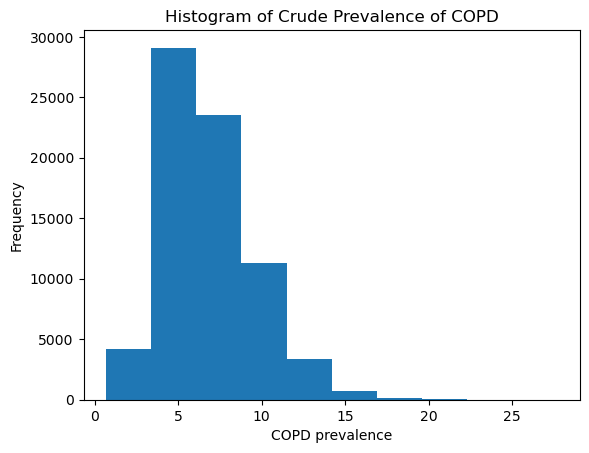

In [25]:
_ = plt.hist(df4['COPD_prevalence'])
_ = plt.ylabel('Frequency')
_ = plt.xlabel('COPD prevalence')
_ = plt.title('Histogram of Crude Prevalence of COPD')

In [26]:
df4.corr()

COPD_prevalence      PM25     OZONE  DieselPM  AirToxicsRisk  \
COPD_prevalence         1.000000 -0.039750 -0.078967 -0.256896      -0.054721   
PM25                   -0.039750  1.000000  0.401830  0.248008       0.392767   
OZONE                  -0.078967  0.401830  1.000000  0.039513       0.096450   
DieselPM               -0.256896  0.248008  0.039513  1.000000       0.343077   
AirToxicsRisk          -0.054721  0.392767  0.096450  0.343077       1.000000   
RESP                   -0.097198  0.545526  0.128479  0.585017       0.619348   
PTRAF                  -0.180631  0.220669  0.037795  0.456339       0.169065   
PRE1960PCT              0.106012  0.052940  0.011966  0.324646      -0.011072   
PNPL                   -0.095000  0.062338 -0.008894  0.207096       0.054519   
PRMP                    0.031072  0.226179  0.065721  0.238852       0.178917   
PTSDF                  -0.147708  0.057516 -0.021075  0.617922       0.154636   
PWDIS                  -0.002698  0.003380  0.000751  0.004680      -0.001279   

                     RESP     PTRAF  PRE1960PCT      PNPL      PRMP     PTSDF  \
COPD_prevalence -0.097198 -0.180631    0.106012 -0.095000  0.031072 -0.147708   
PM25             0.545526  0.220669    0.052940  0.062338  0.226179  0.057516   
OZONE            0.128479  0.037795    0.011966 -0.008894  0.065721 -0.021075   
DieselPM         0.585017  0.456339    0.324646  0.207096  0.238852  0.617922   
AirToxicsRisk    0.619348  0.169065   -0.011072  0.054519  0.178917  0.154636   
RESP             1.000000  0.314657    0.002878  0.101524  0.210057  0.337806   
PTRAF            0.314657  1.000000    0.234633  0.129830  0.183744  0.303923   
PRE1960PCT       0.002878  0.234633    1.000000  0.167739  0.255859  0.214053   
PNPL             0.101524  0.129830    0.167739  1.000000  0.160936  0.142546   
PRMP             0.210057  0.183744    0.255859  0.160936  1.000000  0.045509   
PTSDF            0.337806  0.303923    0.214053  0.142546  0.045509  1.000000   
PWDIS           -0.001408  0.003891    0.007079  0.004078  0.018822  0.000967   

                    PWDIS  
COPD_prevalence -0.002698  
PM25             0.003380  
OZONE            0.000751  
DieselPM         0.004680  
AirToxicsRisk   -0.001279  
RESP            -0.001408  
PTRAF            0.003891  
PRE1960PCT       0.007079  
PNPL             0.004078  
PRMP             0.018822  
PTSDF            0.000967  
PWDIS            1.000000

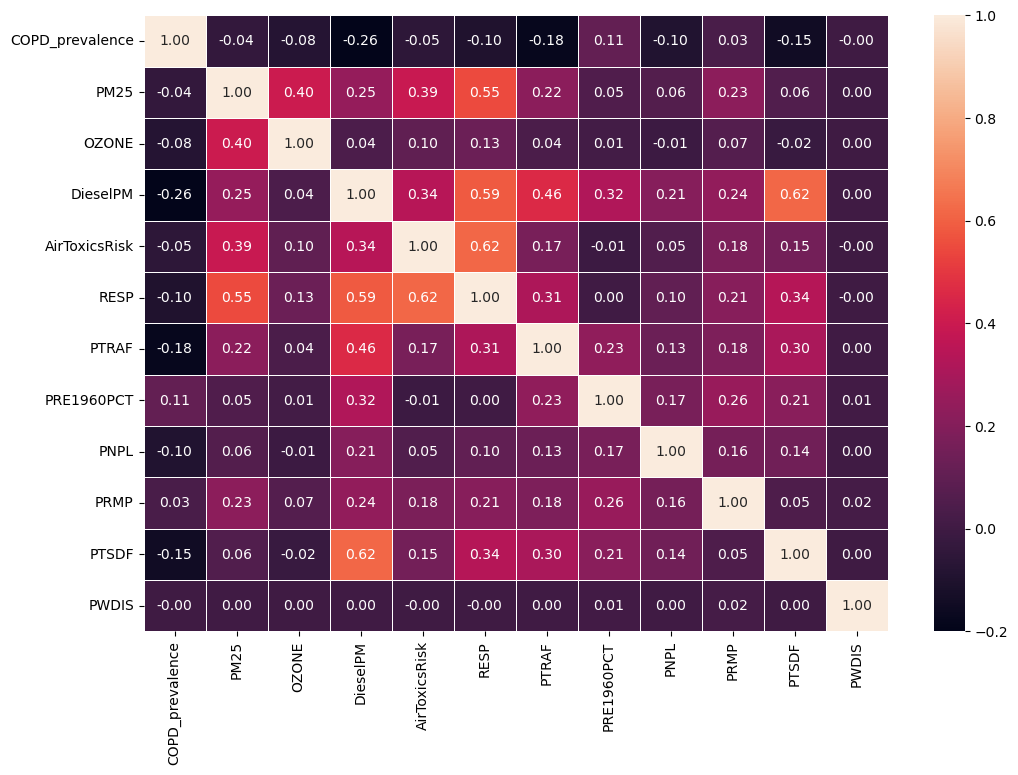

In [27]:
f, ax = plt.subplots(figsize=(12, 8))
_ = sns.heatmap(df4.corr(), vmin=-.2, vmax=1, annot=True, fmt=".2f", linewidth=.5)

Only PRE1960PCT and PRMP show a positive correlation to crude prevalence of COPD.

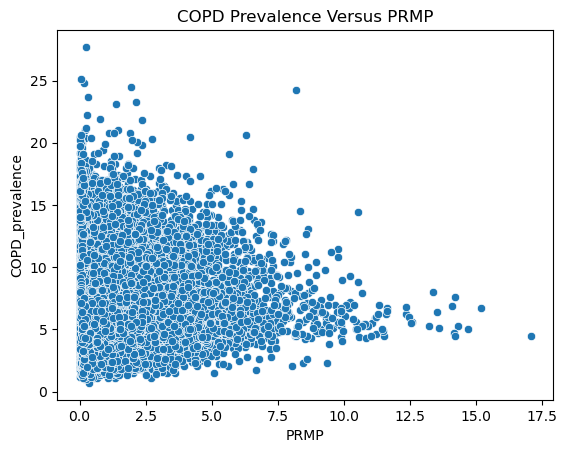

In [28]:
_ = sns.scatterplot(x='PRMP', y='COPD_prevalence', data=df4)
_ = _.set_title('COPD Prevalence Versus PRMP')

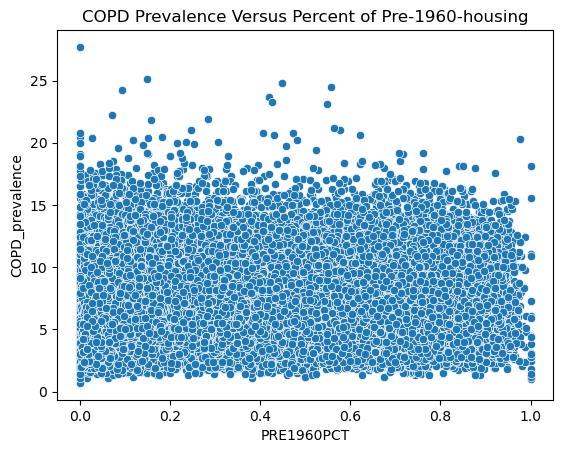

In [29]:
_ = sns.scatterplot(x='PRE1960PCT', y='COPD_prevalence', data=df4)
_ = _.set_title('COPD Prevalence Versus Percent of Pre-1960-housing')

No reasonable correlations for COPD prevalence either

b

Now CHD

In [30]:
df5 = pd.read_csv('C:/Users/butle/hp/Capstone_Two/data/interim/CHD_data.csv')
df5.head()

CensusTract  CHD_prevalence  Low_Confidence_Limit  High_Confidence_Limit  \
0   1001020200             5.9                   5.5                    6.3   
1   1001020400             7.1                   6.4                    7.9   
2   1001021000             7.3                   7.0                    7.7   
3   1003010905             6.4                   6.0                    6.8   
4   1003010906             7.9                   7.2                    8.6   

   TotalPopHealth      PM25      OZONE  DieselPM  AirToxicsRisk      RESP  \
0            2170  9.711240  36.836966  0.304313      50.320741  0.808744   
1            4386  9.761186  36.949586  0.447920      51.595926  0.835904   
2            2894  9.292441  35.908669  0.160869      45.941855  0.733025   
3            8011  8.402913  37.153641  0.233462      35.633327  0.528960   
4            4302  8.414995  36.808459  0.249121      36.136884  0.539997   

        PTRAF  PRE1960PCT      PNPL      PRMP     PTSDF         PWDIS  
0  133.186831    0.262809  0.073066  0.083303  0.867199  0.000000e+00  
1  448.339640    0.114548  0.084700  0.087962  2.299506  0.000000e+00  
2    4.501463    0.166322  0.024765  0.222258  0.042577  2.861655e-04  
3  224.749567    0.099045  0.020701  0.528059  0.078937  1.444756e-04  
4  103.595218    0.063483  0.021972  0.614922  0.063767  1.033556e-07

In [31]:
df5.drop(['Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopHealth'], axis=1, inplace=True)
df5.set_index('CensusTract', inplace=True)
df5.head()

CHD_prevalence      PM25      OZONE  DieselPM  AirToxicsRisk  \
CensusTract                                                                 
1001020200              5.9  9.711240  36.836966  0.304313      50.320741   
1001020400              7.1  9.761186  36.949586  0.447920      51.595926   
1001021000              7.3  9.292441  35.908669  0.160869      45.941855   
1003010905              6.4  8.402913  37.153641  0.233462      35.633327   
1003010906              7.9  8.414995  36.808459  0.249121      36.136884   

                 RESP       PTRAF  PRE1960PCT      PNPL      PRMP     PTSDF  \
CensusTract                                                                   
1001020200   0.808744  133.186831    0.262809  0.073066  0.083303  0.867199   
1001020400   0.835904  448.339640    0.114548  0.084700  0.087962  2.299506   
1001021000   0.733025    4.501463    0.166322  0.024765  0.222258  0.042577   
1003010905   0.528960  224.749567    0.099045  0.020701  0.528059  0.078937   
1003010906   0.539997  103.595218    0.063483  0.021972  0.614922  0.063767   

                    PWDIS  
CensusTract                
1001020200   0.000000e+00  
1001020400   0.000000e+00  
1001021000   2.861655e-04  
1003010905   1.444756e-04  
1003010906   1.033556e-07

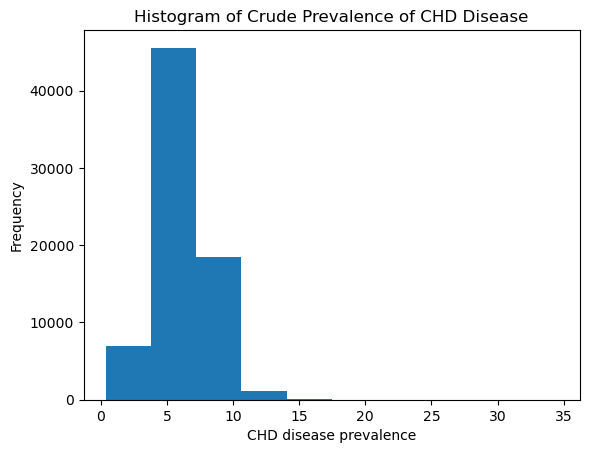

In [32]:
_ = plt.hist(df5['CHD_prevalence'])
_ = plt.ylabel('Frequency')
_ = plt.xlabel('CHD disease prevalence')
_ = plt.title('Histogram of Crude Prevalence of CHD Disease')

Visualizing parameters to see any clear correlations.

In [33]:
df5.corr()

CHD_prevalence      PM25     OZONE  DieselPM  AirToxicsRisk  \
CHD_prevalence        1.000000 -0.093471 -0.112446 -0.274925      -0.089541   
PM25                 -0.093471  1.000000  0.401830  0.248008       0.392767   
OZONE                -0.112446  0.401830  1.000000  0.039513       0.096450   
DieselPM             -0.274925  0.248008  0.039513  1.000000       0.343077   
AirToxicsRisk        -0.089541  0.392767  0.096450  0.343077       1.000000   
RESP                 -0.153073  0.545526  0.128479  0.585017       0.619348   
PTRAF                -0.193048  0.220669  0.037795  0.456339       0.169065   
PRE1960PCT            0.082332  0.052940  0.011966  0.324646      -0.011072   
PNPL                 -0.104218  0.062338 -0.008894  0.207096       0.054519   
PRMP                 -0.021182  0.226179  0.065721  0.238852       0.178917   
PTSDF                -0.144604  0.057516 -0.021075  0.617922       0.154636   
PWDIS                 0.001107  0.003380  0.000751  0.004680      -0.001279   

                    RESP     PTRAF  PRE1960PCT      PNPL      PRMP     PTSDF  \
CHD_prevalence -0.153073 -0.193048    0.082332 -0.104218 -0.021182 -0.144604   
PM25            0.545526  0.220669    0.052940  0.062338  0.226179  0.057516   
OZONE           0.128479  0.037795    0.011966 -0.008894  0.065721 -0.021075   
DieselPM        0.585017  0.456339    0.324646  0.207096  0.238852  0.617922   
AirToxicsRisk   0.619348  0.169065   -0.011072  0.054519  0.178917  0.154636   
RESP            1.000000  0.314657    0.002878  0.101524  0.210057  0.337806   
PTRAF           0.314657  1.000000    0.234633  0.129830  0.183744  0.303923   
PRE1960PCT      0.002878  0.234633    1.000000  0.167739  0.255859  0.214053   
PNPL            0.101524  0.129830    0.167739  1.000000  0.160936  0.142546   
PRMP            0.210057  0.183744    0.255859  0.160936  1.000000  0.045509   
PTSDF           0.337806  0.303923    0.214053  0.142546  0.045509  1.000000   
PWDIS          -0.001408  0.003891    0.007079  0.004078  0.018822  0.000967   

                   PWDIS  
CHD_prevalence  0.001107  
PM25            0.003380  
OZONE           0.000751  
DieselPM        0.004680  
AirToxicsRisk  -0.001279  
RESP           -0.001408  
PTRAF           0.003891  
PRE1960PCT      0.007079  
PNPL            0.004078  
PRMP            0.018822  
PTSDF           0.000967  
PWDIS           1.000000

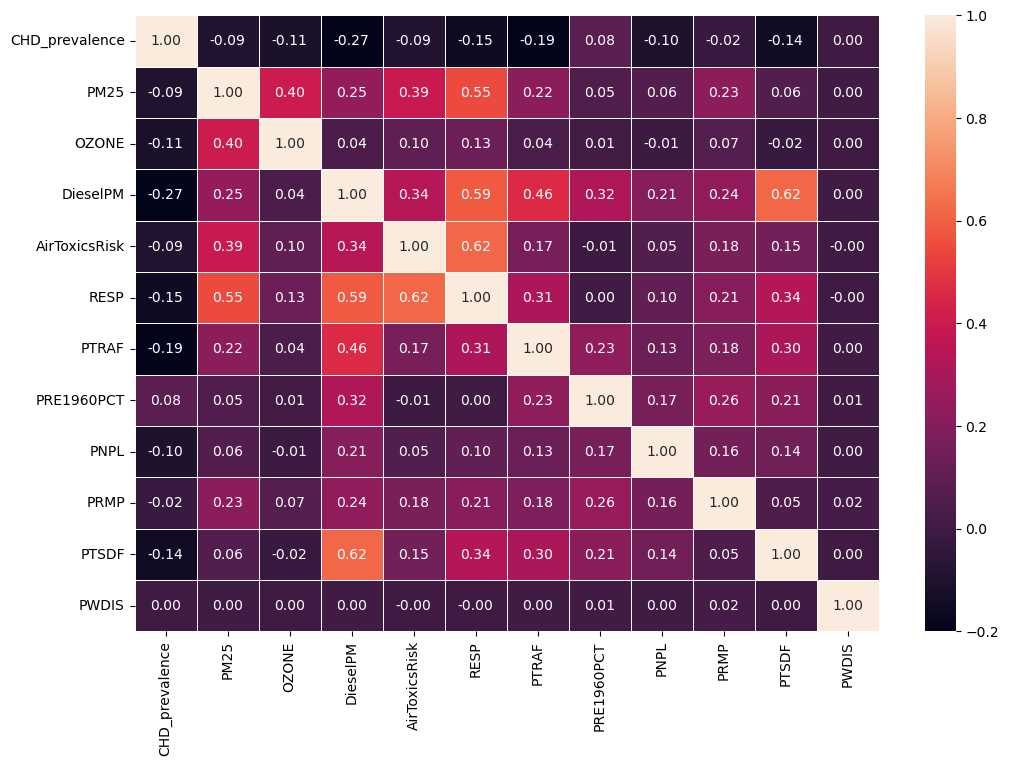

In [34]:
f, ax = plt.subplots(figsize=(12, 8))
_ = sns.heatmap(df5.corr(), vmin=-.2, vmax=1, annot=True, fmt=".2f", linewidth=.5)

Only PRE1960PCT shows a positive correlation to crude prevalence of CHD.

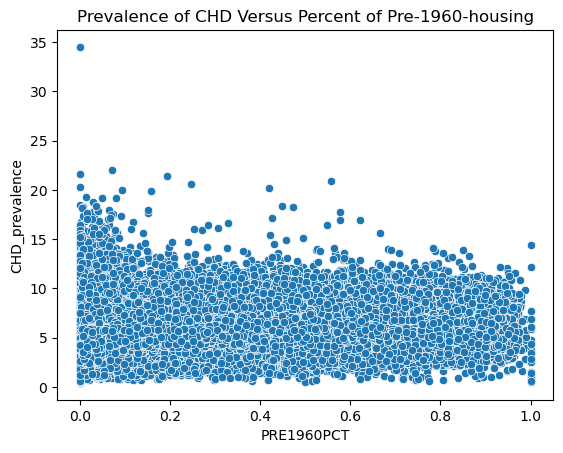

In [35]:
_ = sns.scatterplot(x='PRE1960PCT', y='CHD_prevalence', data=df5)
_ = _.set_title('Prevalence of CHD Versus Percent of Pre-1960-housing')

No reasonable correlation

Trying multiple linear regression with asthma data

In [36]:
X = df.copy()
X = X.drop('Asthma_prevalence', axis=1)
y = df['Asthma_prevalence']
X.head()

PM25      OZONE  DieselPM  AirToxicsRisk      RESP  \
CensusTract                                                           
1001020200   9.711240  36.836966  0.304313      50.320741  0.808744   
1001020400   9.761186  36.949586  0.447920      51.595926  0.835904   
1001021000   9.292441  35.908669  0.160869      45.941855  0.733025   
1003010905   8.402913  37.153641  0.233462      35.633327  0.528960   
1003010906   8.414995  36.808459  0.249121      36.136884  0.539997   

                  PTRAF  PRE1960PCT      PNPL      PRMP     PTSDF  \
CensusTract                                                         
1001020200   133.186831    0.262809  0.073066  0.083303  0.867199   
1001020400   448.339640    0.114548  0.084700  0.087962  2.299506   
1001021000     4.501463    0.166322  0.024765  0.222258  0.042577   
1003010905   224.749567    0.099045  0.020701  0.528059  0.078937   
1003010906   103.595218    0.063483  0.021972  0.614922  0.063767   

                    PWDIS  
CensusTract                
1001020200   0.000000e+00  
1001020400   0.000000e+00  
1001021000   2.861655e-04  
1003010905   1.444756e-04  
1003010906   1.033556e-07

In [37]:
y

CensusTract
1001020200     10.9
1001020400      8.8
1001021000     10.3
1003010905      9.4
1003010906      9.9
               ... 
55139002100     9.5
56005000500     9.4
55133203305     8.6
55105000300    11.6
56005000200    10.1
Name: Asthma_prevalence, Length: 72323, dtype: float64

In [38]:
X = sm.add_constant(X)

In [39]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54242, 12), (18081, 12), (54242, 1), (18081, 1))

In [41]:
asthma_model = sm.OLS(y_train, X_train)
res_asthma_model = asthma_model.fit()
res_asthma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     710.0
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        07:15:40   Log-Likelihood:                -97097.
No. Observations:               54242   AIC:                         1.942e+05
Df Residuals:                   54230   BIC:                         1.943e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.9361      0.042    212.394      0.000       8.854       9.019
PM25             -0.1402      0.005    -27.523      0.000      -0.150      -0.130
OZONE             0.0303      0.001     33.453      0.000       0.029       0.032
DieselPM         -0.6078      0.026    -23.463      0.000      -0.659      -0.557
AirToxicsRisk    -0.0004      0.001     -0.611      0.541      -0.002       0.001
RESP              1.4455      0.070     20.593      0.000       1.308       1.583
PTRAF         -2.516e-05   4.37e-06     -5.759      0.000   -3.37e-05   -1.66e-05
PRE1960PCT        1.9230      0.026     73.070      0.000       1.871       1.975
PNPL             -0.1514      0.023     -6.478      0.000      -0.197      -0.106
PRMP              0.1263      0.006     20.337      0.000       0.114       0.139
PTSDF            -0.0028      0.000     -7.184      0.000      -0.004      -0.002
PWDIS         -7.636e-06   9.44e-06     -0.809      0.418   -2.61e-05    1.09e-05
==============================================================================
Omnibus:                     9010.420   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19804.056
Skew:                           0.976   Prob(JB):                         0.00
Kurtosis:                       5.225   Cond. No.                     2.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R<sup>2</sup> value is quite low. The muliple linear regression is not a good fit.

Now removing AirToxicsRisk and DieselPM because these are highly correlated with other features.

In [42]:
X = df.copy()
X = X.drop(['Asthma_prevalence', 'AirToxicsRisk', 'DieselPM'], axis=1)
y = df['Asthma_prevalence']
X.head()

PM25      OZONE      RESP       PTRAF  PRE1960PCT      PNPL  \
CensusTract                                                                    
1001020200   9.711240  36.836966  0.808744  133.186831    0.262809  0.073066   
1001020400   9.761186  36.949586  0.835904  448.339640    0.114548  0.084700   
1001021000   9.292441  35.908669  0.733025    4.501463    0.166322  0.024765   
1003010905   8.402913  37.153641  0.528960  224.749567    0.099045  0.020701   
1003010906   8.414995  36.808459  0.539997  103.595218    0.063483  0.021972   

                 PRMP     PTSDF         PWDIS  
CensusTract                                    
1001020200   0.083303  0.867199  0.000000e+00  
1001020400   0.087962  2.299506  0.000000e+00  
1001021000   0.222258  0.042577  2.861655e-04  
1003010905   0.528059  0.078937  1.444756e-04  
1003010906   0.614922  0.063767  1.033556e-07

In [43]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54242, 10), (18081, 10), (54242, 1), (18081, 1))

In [44]:
revised_asthma_model = sm.OLS(y_train, X_train)
res_revised_asthma_model = revised_asthma_model.fit()
res_revised_asthma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     800.3
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        07:15:40   Log-Likelihood:                -97424.
No. Observations:               54242   AIC:                         1.949e+05
Df Residuals:                   54232   BIC:                         1.950e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9760      0.043    211.075      0.000       8.893       9.059
PM25          -0.1309      0.005    -25.710      0.000      -0.141      -0.121
OZONE          0.0302      0.001     33.004      0.000       0.028       0.032
RESP           0.7301      0.055     13.248      0.000       0.622       0.838
PTRAF      -4.519e-05   4.24e-06    -10.659      0.000   -5.35e-05   -3.69e-05
PRE1960PCT     1.7776      0.026     69.545      0.000       1.728       1.828
PNPL          -0.1935      0.024     -8.180      0.000      -0.240      -0.147
PRMP           0.1059      0.006     17.075      0.000       0.094       0.118
PTSDF         -0.0072      0.000    -21.082      0.000      -0.008      -0.007
PWDIS      -7.799e-06   9.48e-06     -0.823      0.411   -2.64e-05    1.08e-05
==============================================================================
Omnibus:                     8058.085   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16660.190
Skew:                           0.906   Prob(JB):                         0.00
Kurtosis:                       5.022   Cond. No.                     1.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
df2.head()

Cancer_prevalence      PM25      OZONE  DieselPM  AirToxicsRisk      RESP  \
0                5.0  9.711240  36.836966  0.304313      50.320741  0.808744   
1                8.0  9.761186  36.949586  0.447920      51.595926  0.835904   
2                6.2  9.292441  35.908669  0.160869      45.941855  0.733025   
3                6.1  8.402913  37.153641  0.233462      35.633327  0.528960   
4                7.1  8.414995  36.808459  0.249121      36.136884  0.539997   

        PTRAF  PRE1960PCT      PNPL      PRMP     PTSDF         PWDIS  
0  133.186831    0.262809  0.073066  0.083303  0.867199  0.000000e+00  
1  448.339640    0.114548  0.084700  0.087962  2.299506  0.000000e+00  
2    4.501463    0.166322  0.024765  0.222258  0.042577  2.861655e-04  
3  224.749567    0.099045  0.020701  0.528059  0.078937  1.444756e-04  
4  103.595218    0.063483  0.021972  0.614922  0.063767  1.033556e-07

Now try the same thing with the cancer data.

In [58]:
X = df2.copy()
X = X.drop('Cancer_prevalence', axis=1)


In [59]:
y = df2['Cancer_prevalence']
X.head()

PM25      OZONE  DieselPM  AirToxicsRisk      RESP       PTRAF  \
0  9.711240  36.836966  0.304313      50.320741  0.808744  133.186831   
1  9.761186  36.949586  0.447920      51.595926  0.835904  448.339640   
2  9.292441  35.908669  0.160869      45.941855  0.733025    4.501463   
3  8.402913  37.153641  0.233462      35.633327  0.528960  224.749567   
4  8.414995  36.808459  0.249121      36.136884  0.539997  103.595218   

   PRE1960PCT      PNPL      PRMP     PTSDF         PWDIS  
0    0.262809  0.073066  0.083303  0.867199  0.000000e+00  
1    0.114548  0.084700  0.087962  2.299506  0.000000e+00  
2    0.166322  0.024765  0.222258  0.042577  2.861655e-04  
3    0.099045  0.020701  0.528059  0.078937  1.444756e-04  
4    0.063483  0.021972  0.614922  0.063767  1.033556e-07

In [60]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54242, 12), (18081, 12), (54242, 1), (18081, 1))

In [61]:
cancer_model = sm.OLS(y_train, X_train)
res_cancer_model = cancer_model.fit()
res_cancer_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     953.9
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        07:23:10   Log-Likelihood:            -1.0533e+05
No. Observations:               54242   AIC:                         2.107e+05
Df Residuals:                   54230   BIC:                         2.108e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.2928      0.049    170.463      0.000       8.197       8.388
PM25             -0.0385      0.006     -6.494      0.000      -0.050      -0.027
OZONE            -0.0142      0.001    -13.456      0.000      -0.016      -0.012
DieselPM         -0.9079      0.030    -30.168      0.000      -0.967      -0.849
AirToxicsRisk    -0.0012      0.001     -1.740      0.082      -0.002       0.000
RESP             -1.3464      0.080    -16.755      0.000      -1.504      -1.189
PTRAF            -0.0001   5.06e-06    -24.815      0.000      -0.000      -0.000
PRE1960PCT        0.4202      0.031     13.721      0.000       0.360       0.480
PNPL             -0.3015      0.027    -10.995      0.000      -0.355      -0.248
PRMP             -0.2214      0.007    -30.474      0.000      -0.236      -0.207
PTSDF             0.0035      0.000      7.943      0.000       0.003       0.004
PWDIS          6.863e-06    1.1e-05      0.626      0.532   -1.46e-05    2.84e-05
==============================================================================
Omnibus:                    10872.824   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63447.704
Skew:                           0.841   Prob(JB):                         0.00
Kurtosis:                       8.025   Cond. No.                     2.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R<sup>2</sup> value is much higher for predicting cancer than asthma given these data

Trying CHD prediction using multiple linear regression.

In [434]:
X = df5.copy()
X = X.drop('CHD_prevalence', axis=1)
y = df5['CHD_prevalence']

In [435]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54242, 11), (18081, 11), (54242, 1), (18081, 1))

In [437]:
CHD_model = sm.OLS(y_train, X_train)
res_CHD_model = CHD_model.fit()
res_CHD_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                          4.026e+04
Date:                Wed, 26 Apr 2023   Prob (F-statistic):                        0.00
Time:                        13:45:08   Log-Likelihood:                     -1.1840e+05
No. Observations:               54242   AIC:                                  2.368e+05
Df Residuals:                   54231   BIC:                                  2.369e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
PM25              0.2888      0.007     40.608      0.000       0.275       0.303
OZONE             0.0632      0.001     58.011      0.000       0.061       0.065
DieselPM         -1.9722      0.038    -51.642      0.000      -2.047      -1.897
AirToxicsRisk     0.0078      0.001      9.028      0.000       0.006       0.009
RESP              2.3878      0.102     23.371      0.000       2.188       2.588
PTRAF            -0.0002   6.36e-06    -33.301      0.000      -0.000      -0.000
PRE1960PCT        2.5612      0.038     66.855      0.000       2.486       2.636
PNPL             -0.3571      0.035    -10.169      0.000      -0.426      -0.288
PRMP             -0.0572      0.009     -6.267      0.000      -0.075      -0.039
PTSDF             0.0025      0.001      4.416      0.000       0.001       0.004
PWDIS          1.233e-05    1.4e-05      0.879      0.379   -1.52e-05    3.98e-05
==============================================================================
Omnibus:                     8378.852   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30297.854
Skew:                           0.759   Prob(JB):                         0.00
Kurtosis:                       6.332   Cond. No.                     2.07e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

These results are identical to the results for the cancer data. 

Now COPD analysis

In [438]:
X = df4.copy()
X = X.drop('COPD_prevalence', axis=1)
y = df4['COPD_prevalence']

In [439]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54242, 12), (18081, 12), (54242, 1), (18081, 1))

In [440]:
COPD_model = sm.OLS(y_train, X_train)
res_COPD_model = COPD_model.fit()
res_COPD_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     851.0
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:50:19   Log-Likelihood:            -1.2490e+05
No. Observations:               54242   AIC:                         2.498e+05
Df Residuals:                   54230   BIC:                         2.499e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.3739      0.070    105.697      0.000       7.237       7.511
PM25              0.0129      0.009      1.514      0.130      -0.004       0.030
OZONE            -0.0304      0.002    -20.058      0.000      -0.033      -0.027
DieselPM         -2.6664      0.043    -62.043      0.000      -2.751      -2.582
AirToxicsRisk    -0.0007      0.001     -0.745      0.456      -0.003       0.001
RESP              2.9249      0.115     25.406      0.000       2.699       3.151
PTRAF            -0.0002   7.22e-06    -27.230      0.000      -0.000      -0.000
PRE1960PCT        2.4747      0.044     56.328      0.000       2.389       2.561
PNPL             -0.6653      0.040    -16.834      0.000      -0.743      -0.588
PRMP              0.1542      0.010     14.941      0.000       0.134       0.174
PTSDF             0.0037      0.001      5.784      0.000       0.002       0.005
PWDIS            -0.0001   6.39e-05     -2.161      0.031      -0.000   -1.29e-05
==============================================================================
Omnibus:                     8067.574   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15455.605
Skew:                           0.936   Prob(JB):                         0.00
Kurtosis:                       4.825   Cond. No.                     2.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Like asthma, these features do not predict COPD well.

Now kidney disease analysis.

In [442]:
X = df3.copy()
X = X.drop('Kidney_prevalence', axis=1)
y = df3['Kidney_prevalence']

In [443]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54242, 12), (18081, 12), (54242, 1), (18081, 1))

In [444]:
Kidney_model = sm.OLS(y_train, X_train)
res_Kidney_model = Kidney_model.fit()
res_Kidney_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     527.5
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:53:44   Log-Likelihood:                -65541.
No. Observations:               54242   AIC:                         1.311e+05
Df Residuals:                   54230   BIC:                         1.312e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.0060      0.024    127.511      0.000       2.960       3.052
PM25             -0.0106      0.003     -3.739      0.000      -0.016      -0.005
OZONE            -0.0102      0.001    -20.191      0.000      -0.011      -0.009
DieselPM         -0.5322      0.014    -36.740      0.000      -0.561      -0.504
AirToxicsRisk     0.0003      0.000      0.884      0.377      -0.000       0.001
RESP              1.0597      0.038     27.646      0.000       0.985       1.135
PTRAF         -3.605e-05    2.4e-06    -15.031      0.000   -4.08e-05   -3.14e-05
PRE1960PCT        0.8564      0.015     58.260      0.000       0.828       0.885
PNPL             -0.1935      0.013    -14.418      0.000      -0.220      -0.167
PRMP              0.0685      0.003     19.648      0.000       0.062       0.075
PTSDF            -0.0007      0.000     -3.198      0.001      -0.001      -0.000
PWDIS         -4.599e-05   2.01e-05     -2.290      0.022   -8.53e-05   -6.64e-06
==============================================================================
Omnibus:                    12701.373   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49172.990
Skew:                           1.128   Prob(JB):                         0.00
Kurtosis:                       7.083   Cond. No.                     2.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

These data have the least ability to predict kidney problems.